## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, f1_score,
    precision_score, recall_score, roc_auc_score, balanced_accuracy_score
)
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


## Reading Data

In [4]:
df = pd.read_csv("K:\DEPI\Final Project\Mental_Model1\Mental_Model\Mental_Model\data\proccesed\Final.csv")
df


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0,8.0,0.0,0,...,Elderly (70+),1.702775,83.182065,28.566,0,0,1,0,1.0,No
1,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,0,6.0,0.0,0,...,Elderly (70+),1.600000,68.040000,26.570,0,0,0,0,0.0,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,1,5.0,0.0,0,...,Seniors (55-69),1.570000,63.500000,25.610,0,0,0,0,1.0,No
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,1,7.0,0.0,0,...,Seniors (55-69),1.650000,63.500000,23.300,0,0,1,1,0.0,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,0.0,0,...,Early Middle Age (35-44),1.570000,53.980000,21.770,1,0,0,1,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394493,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,1,6.0,0.0,0,...,Young Adults (18-34),1.650000,69.850000,25.630,1,1,0,0,0.0,No
394494,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,1,7.0,0.0,0,...,Late Middle Age (45-54),1.700000,83.010000,28.660,0,1,1,0,1.0,No
394495,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,0,5.0,1.0,0,...,Seniors (55-69),1.700000,49.900000,17.230,1,0,0,0,0.0,No
394496,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0,5.0,0.0,1,...,Elderly (70+),1.830000,108.860000,32.550,0,1,1,1,0.0,No


In [5]:
pd.set_option('display.max_columns' , None)

## Encoding

In [ ]:
oe = OrdinalEncoder(categories=[['Poor','Fair','Good' , 'Very good' , 'Excellent' ]])
df['GeneralHealth'] = oe.fit_transform(df[['GeneralHealth']])

oe1 = OrdinalEncoder(categories=[['Young Adults (18-34)' , 'Early Middle Age (35-44)' , 'Late Middle Age (45-54)' , 'Seniors (55-69)','Elderly (70+)']])
df['AgeCategory'] = oe1.fit_transform(df[['AgeCategory']])

In [ ]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [ ]:
le = LabelEncoder()
cols = ['State', 'RaceEthnicityCategory' , 'LastCheckupTime' , 'HighRiskLastYear']   # الأعمدة الكاتيجوريكال

for c in cols:
    df[c] = le.fit_transform(df[c])

In [8]:
df['Sex'].value_counts()

Sex
0    208932
1    185566
Name: count, dtype: int64

In [24]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear'],
      dtype='object')

# Rebalancing Data (Under Sampling)

under-sampling is clearly not the most desirable solution, since it removes a significant amount of information and may discard valuable signal, but it was the approach that allowed the model to actually start generalizing. 
This is largely due to the strong non-linearity between features and the highly imbalanced nature of the target.
 Moreover, the features in the dataset are only weakly correlated with each other and with the target, which itself represents a very broad outcome that is not solely determined by lifestyle or medical indicators, but also by social and personal factors that are impossible to capture in such datasets, Even after under-sampling, a large and useful portion of the data was still preserved

In [12]:

df_majority = df[df['HadDepressiveDisorder'] == 0]
df_minority = df[df['HadDepressiveDisorder'] == 1]

ratio = 1
n_majority_needed = len(df_minority) * ratio

df_majority_sampled = df_majority.sample(n_majority_needed, random_state=42)

df_balanced = pd.concat([df_majority_sampled, df_minority])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [13]:
df_balanced.shape

(165788, 39)

In [19]:
df_balanced.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear'],
      dtype='object')

In [14]:
df_balanced

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear
0,5,0,4.0,0.0,4.0,3,1,9.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Former smoker,Never used e-cigarettes in my entire life,0,4,3.0,1.68,74.84,26.63,0,0,1,1,1.0,0
1,6,0,3.0,0.0,3.0,2,1,6.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Never smoked,Not at all (right now),0,4,1.0,1.65,58.97,21.63,1,1,1,1,1.0,0
2,30,1,1.0,5.0,0.0,3,1,12.0,1.0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,Current smoker - now smokes every day,Never used e-cigarettes in my entire life,1,4,4.0,1.78,77.11,24.39,1,0,1,0,1.0,0
3,12,1,1.0,7.0,4.0,3,1,8.0,1.0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0,Former smoker,Use them every day,1,3,4.0,1.70,62.14,21.46,1,0,1,0,1.0,0
4,38,1,3.0,0.0,2.0,3,1,7.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Never smoked,Not at all (right now),1,4,2.0,1.88,113.40,32.10,1,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165783,24,1,0.0,29.0,29.0,3,0,10.0,0.0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,Former smoker,Not at all (right now),1,4,2.0,1.88,172.37,48.79,0,0,0,0,1.0,0
165784,16,0,2.0,25.0,3.0,3,1,7.0,1.0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,Former smoker,Never used e-cigarettes in my entire life,1,4,4.0,1.47,74.84,34.48,1,0,0,1,1.0,0
165785,33,0,1.0,0.0,8.0,3,1,5.0,1.0,0,0,0,1,0,0,1,0,1,1,0,1,1,1,1,1,Never smoked,Never used e-cigarettes in my entire life,1,0,3.0,1.75,97.52,31.75,1,1,0,0,0.0,0
165786,45,0,2.0,4.0,25.0,3,1,4.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,Current smoker - now smokes every day,Not at all (right now),1,4,3.0,1.60,61.23,23.91,0,0,0,0,1.0,0


# Modeling 

In [20]:
drop_list = ['State' ,'LastCheckupTime' , 'RemovedTeeth' , 'HadAngina' , 'HadStroke' , 'HadAsthma' , 'HadSkinCancer' , 'HadCOPD' , 'HadKidneyDisease', 'HadArthritis' , 'ChestScan' , 'BMI' , 
             'HIVTesting' , 'FluVaxLast12' , 'PneumoVaxEver' , 'TetanusLast10Tdap'  , 'HadDepressiveDisorder'  , 'HadHeartAttack' , 'HighRiskLastYear' , 'SmokerStatus' , 'ECigaretteUsage' ]
X = df_balanced.drop(columns=drop_list)

In [21]:
y = df_balanced['HadDepressiveDisorder']
y.shape

(165788,)

## CatBoost Model

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

CatModel = CatBoostClassifier(
    iterations=3000,
    learning_rate=0.03,
    depth=8,
    loss_function='Logloss',
    eval_metric='F1',
    verbose=200,
    random_state=42,
    l2_leaf_reg=3,
    bagging_temperature=0.8,
    border_count=128
)

CatModel.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model=True
)

y_pred_proba = CatModel.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)

f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", round(acc,4))
print("F1:", round(f1,4))

print("----------------------")
print(classification_report(y_test, y_pred, digits=4))


0:	learn: 0.7374015	test: 0.7338100	best: 0.7338100 (0)	total: 238ms	remaining: 11m 52s
200:	learn: 0.7504098	test: 0.7437640	best: 0.7439092 (184)	total: 3.46s	remaining: 48.2s
400:	learn: 0.7554213	test: 0.7439352	best: 0.7442023 (363)	total: 6.44s	remaining: 41.7s
600:	learn: 0.7596193	test: 0.7441308	best: 0.7443167 (463)	total: 9.75s	remaining: 38.9s
800:	learn: 0.7631634	test: 0.7438663	best: 0.7444747 (640)	total: 13.4s	remaining: 36.7s
1000:	learn: 0.7665353	test: 0.7434921	best: 0.7444747 (640)	total: 17s	remaining: 34s
1200:	learn: 0.7701022	test: 0.7431553	best: 0.7444747 (640)	total: 20.1s	remaining: 30.1s
1400:	learn: 0.7731670	test: 0.7437655	best: 0.7444747 (640)	total: 23.4s	remaining: 26.7s
1600:	learn: 0.7758941	test: 0.7437026	best: 0.7444747 (640)	total: 26.7s	remaining: 23.3s
1800:	learn: 0.7787199	test: 0.7430209	best: 0.7444747 (640)	total: 30.4s	remaining: 20.3s
2000:	learn: 0.7815739	test: 0.7429495	best: 0.7444747 (640)	total: 33.9s	remaining: 16.9s
2200:	lear

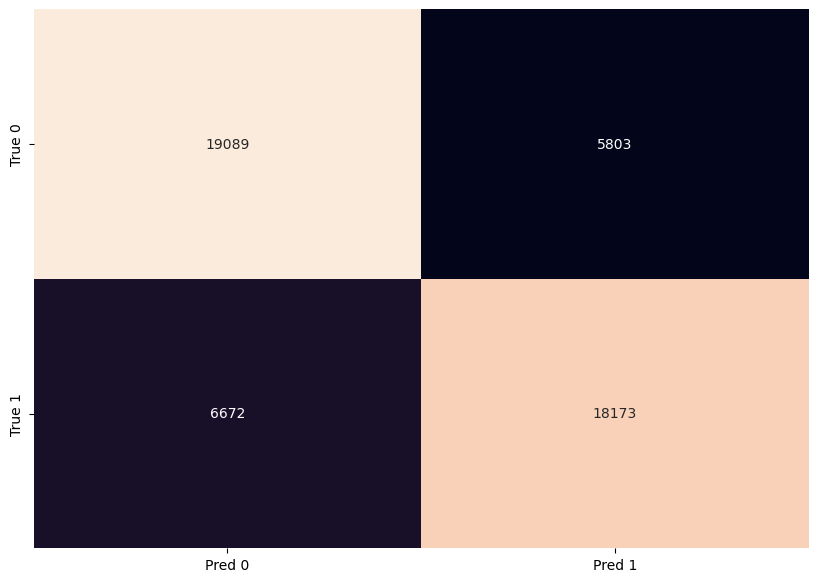

In [23]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
                xticklabels=["Pred 0","Pred 1"],
                yticklabels=["True 0","True 1"])
plt.show()

#### CatBoost Worked slightly better than XGboost And Neural Network

## HyperParams Tuning for CatBoost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, f1_score, roc_auc_score, accuracy_score, precision_score, recall_score
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)


cat_model = CatBoostClassifier(
    loss_function='Logloss',
    eval_metric='AUC',
    random_state=42,
    verbose=0
)

param_grid = {
    'depth': [8, 10],
    'learning_rate': [0.03, 0.07],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [1500 , 2000],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring='f1',        
    cv=3,              
    n_jobs=-1           
)


grid_search.fit(X_train, y_train)

print("Best Parameters found:")
print(grid_search.best_params_)

best_cat = grid_search.best_estimator_
y_pred = best_cat.predict(X_test)
y_pred_proba = best_cat.predict_proba(X_test)[:, 1]

print("\n Evaluation on Test Data:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("F1:", round(f1_score(y_test, y_pred), 4))
print("AUC:", round(roc_auc_score(y_test, y_pred_proba), 4))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


✅ Best Parameters found:
{'depth': 8, 'iterations': 1500, 'l2_leaf_reg': 5, 'learning_rate': 0.03, 'subsample': 0.8}

🔹 Evaluation on Test Data:
Accuracy: 0.7483
Precision: 0.7567
Recall: 0.7311
F1: 0.7437
AUC: 0.8208

Classification Report:
              precision    recall  f1-score   support

           0     0.7404    0.7654    0.7527     24892
           1     0.7567    0.7311    0.7437     24845

    accuracy                         0.7483     49737
   macro avg     0.7486    0.7483    0.7482     49737
weighted avg     0.7486    0.7483    0.7482     49737



### Among all the models we tested with every possible configuration and adjustment, CatBoost achieved the best performance.

# Saving pkl. File

In [ ]:
with open("model.pkl", "wb") as f:
    pickle.dump(CatModel, f)